In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import pandas as pd
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

# List of possible encodings to try
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']

# Attempt to read the CSV file with different encodings
for encoding in encodings:
    try:
        df = pd.read_csv('spam.csv', encoding=encoding)  # Use the uploaded filename
        print(f"File successfully read with encoding: {encoding}")
        print(df.head())  # Display the first few rows of the DataFrame
        break  # Stop the loop if successful
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}")
        continue  # Try the next encoding
    except FileNotFoundError:
        print("File not found. Please upload the file.")
        break  # Exit the loop if the file is not found


Saving spam.csv to spam.csv
Failed to read with encoding: utf-8
File successfully read with encoding: latin1
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
461,ham,Great. Never been better. Each day gives even ...,NaN,NaN,NaN
5459,ham,If you hear a loud scream in about &lt;#&gt; m...,NaN,NaN,NaN
5252,ham,You do your studies alone without anyones help...,NaN,NaN,NaN
4792,ham,Or u ask they all if next sat can a not. If al...,NaN,NaN,NaN
3287,spam,Someone U know has asked our dating service 2 ...,NaN,NaN,NaN


In [ ]:
import random
from datetime import datetime, timedelta

# Define a function to generate random timestamps
def generate_random_timestamp(start_date, end_date):
    delta = end_date - start_date
    random_seconds = random.randint(0, int(delta.total_seconds()))
    return start_date + timedelta(seconds=random_seconds)

# Define a start and end date for the timestamps
start_date = datetime(2023, 1, 1)
end_date = datetime(2024, 1, 1)

# Add a new column with random timestamps
df['Timestamp'] = [generate_random_timestamp(start_date, end_date) for _ in range(len(df))]

# Display the first few rows to verify
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4           Timestamp  
0        NaN        NaN 2023-12-25 20:24:12  
1        NaN        NaN 2023-04-08 13:20:31  
2        NaN        NaN 2023-05-07 03:30:28  
3        NaN        NaN 2023-11-23 01:11:56  
4        NaN        NaN 2023-05-06 22:28:04  


In [ ]:
df.shape

(5572, 6)

In [ ]:
# 1.Data Cleaning
# 2.EDA
# 3.Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvements
# 7. Website

In [ ]:
# 1.Data Cleaning
# 2.EDA
# 3.Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvements
# 7. Website
# 8. Deploy

1. DATA CLEANING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   v1          5572 non-null   object        
 1   v2          5572 non-null   object        
 2   Unnamed: 2  50 non-null     object        
 3   Unnamed: 3  12 non-null     object        
 4   Unnamed: 4  6 non-null      object        
 5   Timestamp   5572 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 261.3+ KB


In [ ]:
# Drop last three columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [ ]:
df.sample(5)

,v1,v2,Timestamp
213,ham,Yup... How Ì_ noe leh...,2023-08-22 13:07:01
1903,spam,Free entry in 2 a weekly comp for a chance to ...,2023-04-30 09:41:53
3963,ham,"If e timing can, then i go w u lor...",2023-08-24 00:33:53
4338,ham,Just got outta class gonna go gym.,2023-09-25 11:22:53
3553,ham,am up to my eyes in philosophy,2023-03-18 05:40:38


In [ ]:
#renaming cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text,Timestamp
800,spam,Last Chance! Claim ur å£150 worth of discount ...,2023-03-21 18:07:31
3466,spam,URGENT! We are trying to contact U. Todays dra...,2023-10-29 02:10:25
2244,ham,No management puzzeles.,2023-03-27 21:16:56
5443,spam,You have won a guaranteed 32000 award or maybe...,2023-04-05 10:30:06
61,ham,Ha ha ha good joke. Girls are situation seekers.,2023-07-25 01:07:22


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['target'] = encoder.fit_transform(df['target'])

In [ ]:
df.head()

,target,text,Timestamp
0,0,"Go until jurong point, crazy.. Available only ...",2023-12-25 20:24:12
1,0,Ok lar... Joking wif u oni...,2023-04-08 13:20:31
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,2023-05-07 03:30:28
3,0,U dun say so early hor... U c already then say...,2023-11-23 01:11:56
4,0,"Nah I don't think he goes to usf, he lives aro...",2023-05-06 22:28:04


In [ ]:
# missing values
df.isnull().sum()

,0
target,0
text,0
Timestamp,0


In [ ]:
#check duplicate values
df.duplicated().sum()

0

In [ ]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5572, 3)

2. EDA

In [ ]:
df.head()

,target,text,Timestamp
0,0,"Go until jurong point, crazy.. Available only ...",2023-12-25 20:24:12
1,0,Ok lar... Joking wif u oni...,2023-04-08 13:20:31
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,2023-05-07 03:30:28
3,0,U dun say so early hor... U c already then say...,2023-11-23 01:11:56
4,0,"Nah I don't think he goes to usf, he lives aro...",2023-05-06 22:28:04


In [ ]:
df['target'].value_counts() ## ham more than spam

,count
target,
0,4825
1,747


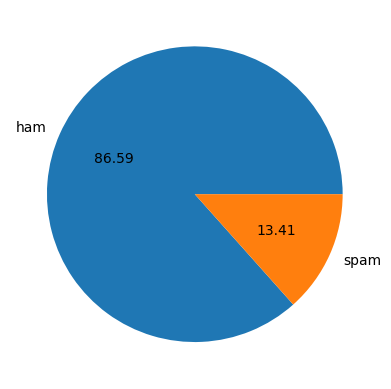

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [ ]:
# Data is imbalanced

In [ ]:
import nltk

In [ ]:
!pip install nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# length of each text
df['num_characters'] = df['text'].apply(len)

In [ ]:
df.head()

,target,text,Timestamp,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",2023-12-25 20:24:12,111
1,0,Ok lar... Joking wif u oni...,2023-04-08 13:20:31,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,2023-05-07 03:30:28,155
3,0,U dun say so early hor... U c already then say...,2023-11-23 01:11:56,49
4,0,"Nah I don't think he goes to usf, he lives aro...",2023-05-06 22:28:04,61


In [ ]:
# num of words
df['text'].apply(lambda x:nltk.word_tokenize(x))

,text
0,"[Go, until, jurong, point, ,, crazy, .., Avail..."
1,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,"[Nah, I, do, n't, think, he, goes, to, usf, ,,..."
...,...
5567,"[This, is, the, 2nd, time, we, have, tried, 2,..."
5568,"[Will, Ì_, b, going, to, esplanade, fr, home, ?]"
5569,"[Pity, ,, *, was, in, mood, for, that, ., So, ..."
5570,"[The, guy, did, some, bitching, but, I, acted,..."


In [ ]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,target,text,Timestamp,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",2023-12-25 20:24:12,111,24
1,0,Ok lar... Joking wif u oni...,2023-04-08 13:20:31,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,2023-05-07 03:30:28,155,37
3,0,U dun say so early hor... U c already then say...,2023-11-23 01:11:56,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",2023-05-06 22:28:04,61,15


In [ ]:
# number of sentences
df['text'].apply(lambda x:nltk.sent_tokenize(x))

,text
0,"[Go until jurong point, crazy.., Available onl..."
1,"[Ok lar..., Joking wif u oni...]"
2,[Free entry in 2 a wkly comp to win FA Cup fin...
3,[U dun say so early hor... U c already then sa...
4,"[Nah I don't think he goes to usf, he lives ar..."
...,...
5567,[This is the 2nd time we have tried 2 contact ...
5568,[Will Ì_ b going to esplanade fr home?]
5569,"[Pity, * was in mood for that., So...any other..."
5570,[The guy did some bitching but I acted like i'...


In [ ]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [ ]:
df.head()

,target,text,Timestamp,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",2023-12-25 20:24:12,111,24,2
1,0,Ok lar... Joking wif u oni...,2023-04-08 13:20:31,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,2023-05-07 03:30:28,155,37,2
3,0,U dun say so early hor... U c already then say...,2023-11-23 01:11:56,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",2023-05-06 22:28:04,61,15,1


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

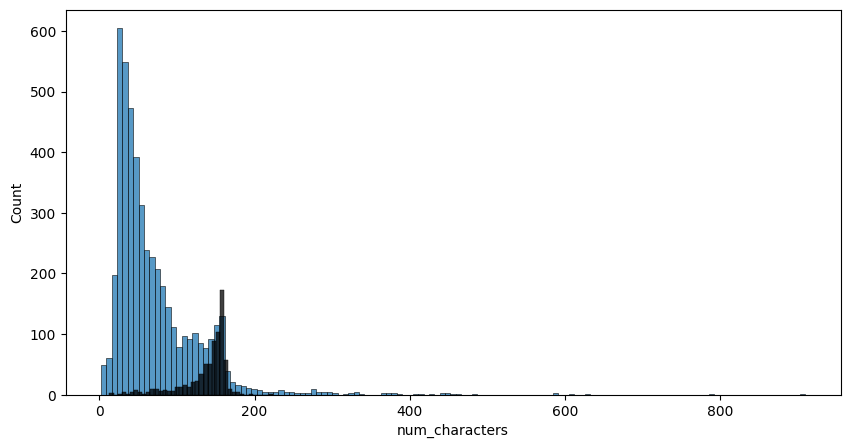

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='black')

<Axes: xlabel='num_words', ylabel='Count'>

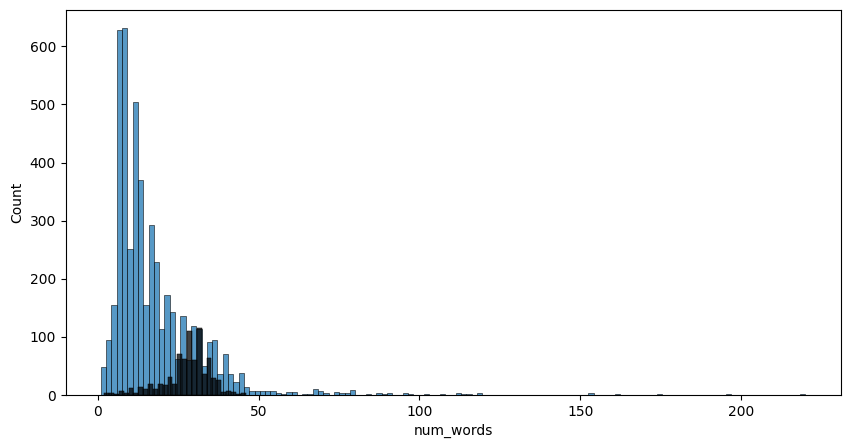

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='black')

<Axes: xlabel='num_sentences', ylabel='Count'>

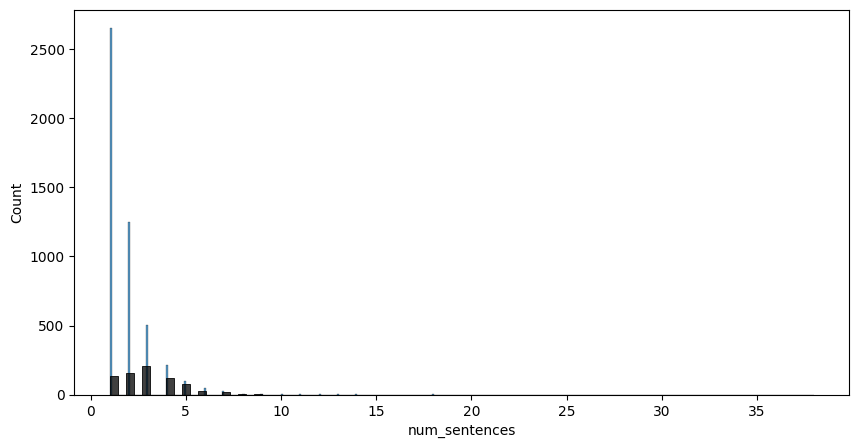

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'],color='black')

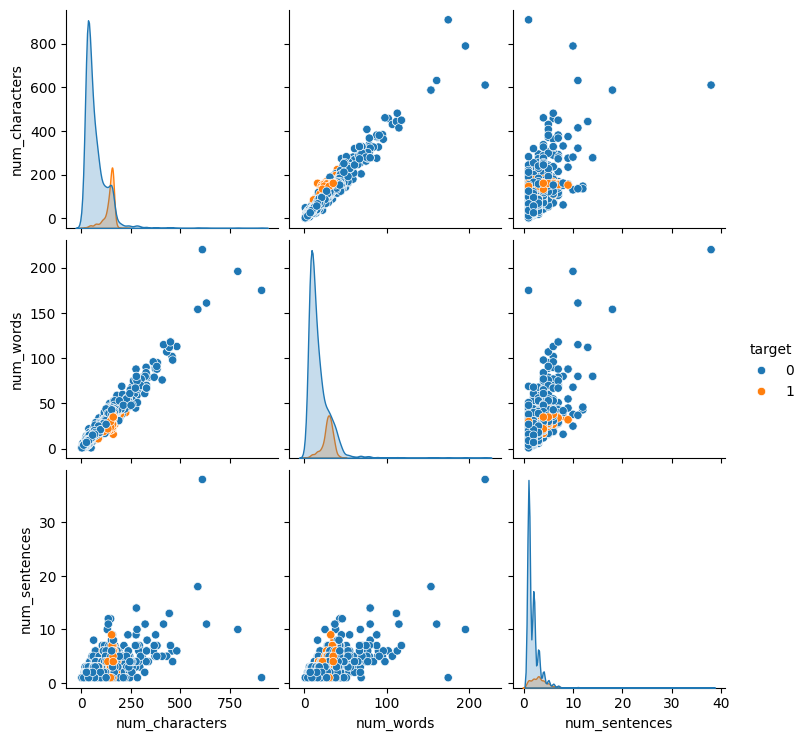

In [ ]:
sns.pairplot(df,hue='target') # 0 - ham , 1 - spam

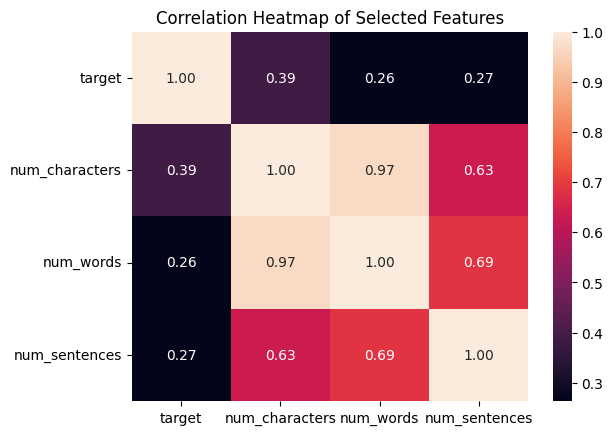

In [ ]:
# Generate the heatmap for the correlation matrix of the specified columns directly
sns.heatmap(df[['target','num_characters', 'num_words', 'num_sentences',]].corr(), annot=True,fmt='.2f')

# Add title
plt.title('Correlation Heatmap of Selected Features')
plt.show()

In [ ]:
print(df.columns)  # Check column names to verify the presence of 'Timestamp' and 'DayOfWeek'

Index(['target', 'text', 'Timestamp', 'num_characters', 'num_words',
       'num_sentences'],
      dtype='object')


In [ ]:
# Convert 'Timestamp' to datetime format (if it's not already in that format)
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')  # 'coerce' will handle any invalid dates

# Check if the conversion was successful
print(df['Timestamp'].head())

0   2023-12-25 20:24:12
1   2023-04-08 13:20:31
2   2023-05-07 03:30:28
3   2023-11-23 01:11:56
4   2023-05-06 22:28:04
Name: Timestamp, dtype: datetime64[ns]


In [ ]:
# Extract the day of the week (e.g., Monday, Tuesday, etc.)
df['DayOfWeek'] = df['Timestamp'].dt.day_name()

# Check the new column to ensure it's added correctly
print(df[['Timestamp', 'DayOfWeek']].head())

            Timestamp DayOfWeek
0 2023-12-25 20:24:12    Monday
1 2023-04-08 13:20:31  Saturday
2 2023-05-07 03:30:28    Sunday
3 2023-11-23 01:11:56  Thursday
4 2023-05-06 22:28:04  Saturday


In [ ]:
# Perform one-hot encoding for the DayOfWeek column (excluding the first column to avoid multicollinearity)
df = pd.get_dummies(df, columns=['DayOfWeek'], drop_first=True)

# Check the updated DataFrame to verify that one-hot encoding was applied correctly
print(df.head())

   target                                               text  \
0       0  Go until jurong point, crazy.. Available only ...   
1       0                      Ok lar... Joking wif u oni...   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...   
3       0  U dun say so early hor... U c already then say...   
4       0  Nah I don't think he goes to usf, he lives aro...   

            Timestamp  num_characters  num_words  num_sentences  \
0 2023-12-25 20:24:12             111         24              2   
1 2023-04-08 13:20:31              29          8              2   
2 2023-05-07 03:30:28             155         37              2   
3 2023-11-23 01:11:56              49         13              1   
4 2023-05-06 22:28:04              61         15              1   

   DayOfWeek_Monday  DayOfWeek_Saturday  DayOfWeek_Sunday  DayOfWeek_Thursday  \
0              True               False             False               False   
1             False                True           

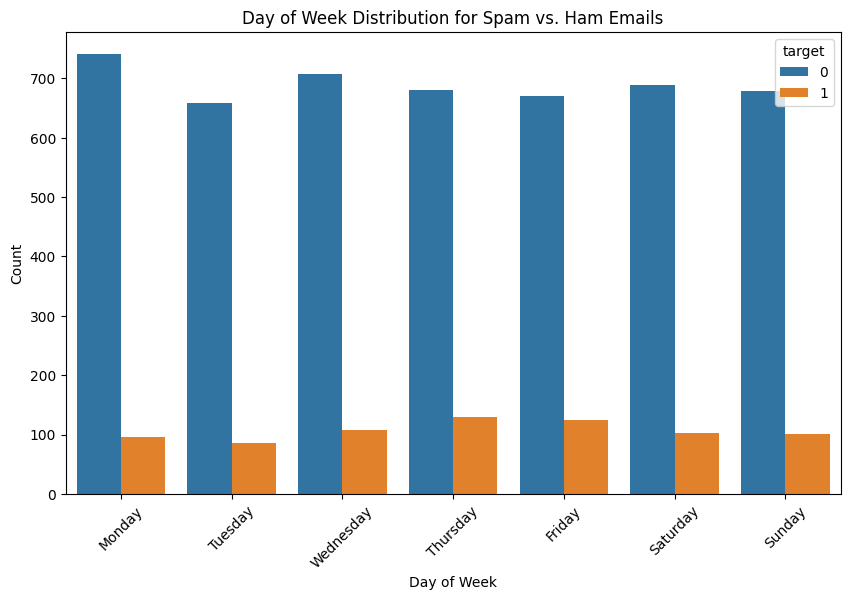

In [ ]:
# Assuming 'DayOfWeek' columns are already created (from your timestamp column)
df['DayOfWeek'] = df['Timestamp'].dt.day_name()  # Extracting day of the week from Timestamp

# Plot the day-of-week distribution for spam and ham emails
plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', hue='target', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Day of Week Distribution for Spam vs. Ham Emails')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



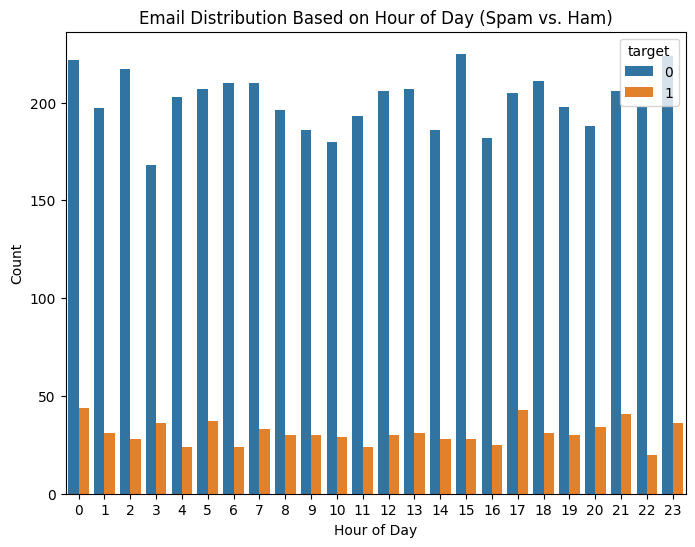

In [ ]:
# Extract hour from the Timestamp
df['hour'] = df['Timestamp'].dt.hour

# Plot the distribution of emails based on the hour of the day for spam and ham
plt.figure(figsize=(8, 6))
sns.countplot(x='hour', hue='target', data=df)
plt.title('Email Distribution Based on Hour of Day (Spam vs. Ham)')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()

3. DATA PREPROCESSING

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords') # you may need to download the stopwords dataset

ps = PorterStemmer()

def transform_text(text):
    text = text.lower() # to convert into lower case
    text = nltk.word_tokenize(text) # tokenization

    y = []
    for i in text:
        if i.isalnum(): # if its alpha numeric
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    #Stemming
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df['transformed_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,Timestamp,num_characters,num_words,num_sentences,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,DayOfWeek,hour,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",2023-12-25 20:24:12,111,24,2,True,False,False,False,False,False,Monday,20,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,2023-04-08 13:20:31,29,8,2,False,True,False,False,False,False,Saturday,13,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,2023-05-07 03:30:28,155,37,2,False,False,True,False,False,False,Sunday,3,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,2023-11-23 01:11:56,49,13,1,False,False,False,True,False,False,Thursday,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",2023-05-06 22:28:04,61,15,1,False,True,False,False,False,False,Saturday,22,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=""))

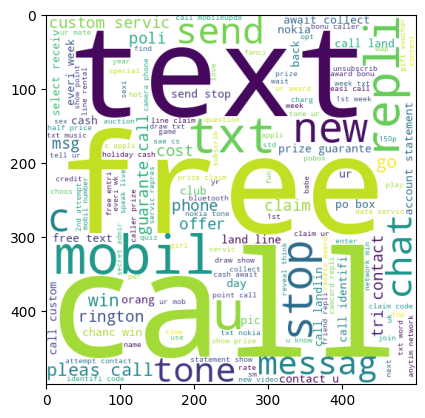

In [ ]:
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=""))

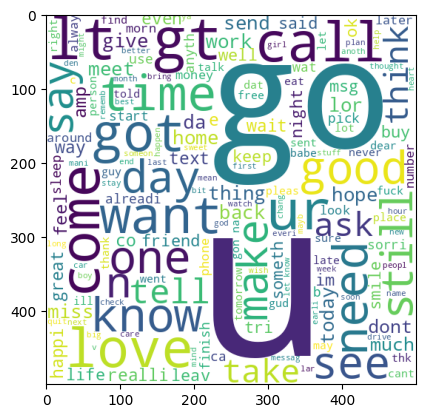

In [ ]:
plt.imshow(ham_wc)

In [ ]:
df.head()

,target,text,Timestamp,num_characters,num_words,num_sentences,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,DayOfWeek,hour,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",2023-12-25 20:24:12,111,24,2,True,False,False,False,False,False,Monday,20,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,2023-04-08 13:20:31,29,8,2,False,True,False,False,False,False,Saturday,13,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,2023-05-07 03:30:28,155,37,2,False,False,True,False,False,False,Sunday,3,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,2023-11-23 01:11:56,49,13,1,False,False,False,True,False,False,Thursday,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",2023-05-06 22:28:04,61,15,1,False,True,False,False,False,False,Saturday,22,nah think goe usf live around though


In [ ]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
len(spam_corpus)

11490

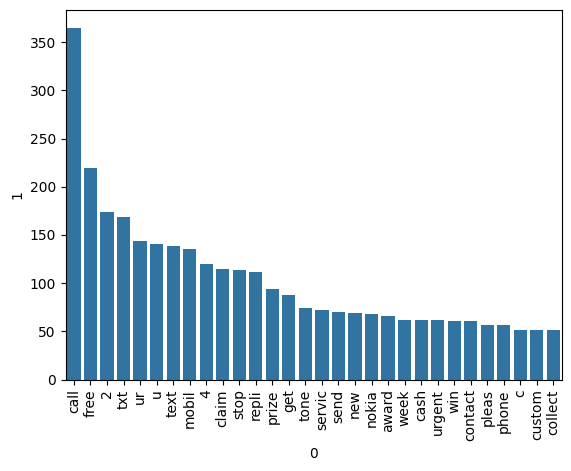

In [ ]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')  # Corrected plt.xticks
plt.show()

In [ ]:
ham_corpus = []
for msg in df[df['target']== 0 ]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [ ]:
len(ham_corpus)

38221

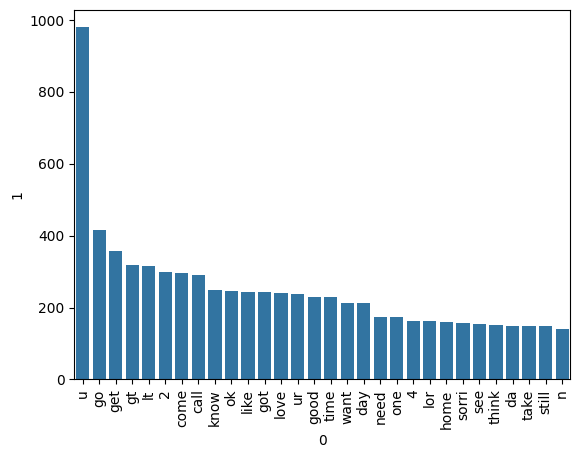

In [ ]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')  # Corrected plt.xticks
plt.show()

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # Convert to datetime

In [ ]:
# Extract day of the week, hour of the day, day of the month, and month
df['day_of_week'] = df['Timestamp'].dt.day_name()  # Name of the day
df['hour'] = df['Timestamp'].dt.hour  # Hour of the day
df['day_of_month'] = df['Timestamp'].dt.day  # Day of the month
df['month'] = df['Timestamp'].dt.month  # Month number (1-12)

In [ ]:
# Create is_weekend flag
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)


In [ ]:
# Check for missing values (if any)
df.isnull().sum()

# If needed, fill missing values (for numerical or categorical columns)
# df['column_name'].fillna(value, inplace=True)


,0
target,0
text,0
Timestamp,0
num_characters,0
num_words,0
num_sentences,0
DayOfWeek_Monday,0
DayOfWeek_Saturday,0
DayOfWeek_Sunday,0
DayOfWeek_Thursday,0


In [ ]:
# One-Hot Encoding for day_of_week (optional, depends on the model)
df = pd.get_dummies(df, columns=['day_of_week'], drop_first=True)

# Label encoding for month or other categorical features (if needed)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['month_encoded'] = encoder.fit_transform(df['month'])

In [ ]:
# Drop the Timestamp column (if no longer needed) or any other redundant columns
df.drop(['Timestamp'], axis=1, inplace=True)

In [ ]:
print(df.columns)

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences',
       'DayOfWeek_Monday', 'DayOfWeek_Saturday', 'DayOfWeek_Sunday',
       'DayOfWeek_Thursday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday',
       'DayOfWeek', 'hour', 'transformed_text', 'day_of_month', 'month',
       'is_weekend', 'day_of_week_Monday', 'day_of_week_Saturday',
       'day_of_week_Sunday', 'day_of_week_Thursday', 'day_of_week_Tuesday',
       'day_of_week_Wednesday', 'month_encoded'],
      dtype='object')


In [ ]:
# Save the processed DataFrame to a new CSV file
df.to_csv('processed_email_data.csv', index=False)


In [ ]:
from google.colab import files
files.download('processed_email_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

step1 : Feature Engineering

In [ ]:
# Extracting the necessary features from your DataFrame
text_features = df[['num_characters', 'num_words', 'num_sentences'] + [col for col in df.columns if 'DayOfWeek' in col]].values

step2 : Tokenization and BERT Embedding

In [ ]:
!pip install transformers

In [ ]:
!pip install torch

In [ ]:
import torch
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler, TensorDataset
from transformers import AdamW, get_linear_schedule_with_warmup
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load your dataset
# df = pd.read_csv('path_to_your_data.csv') # Load your data here

# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text
max_length = 128
encodings = tokenizer(df['transformed_text'].tolist(), truncation=True, padding=True, max_length=max_length, return_tensors='pt')

input_ids = encodings['input_ids']
attention_masks = encodings['attention_mask']

# Convert labels to tensor
labels = torch.tensor(df['target'].values)

# Add additional features (numeric data)
# Assuming you have columns like 'num_characters', 'num_words', 'num_sentences', 'is_weekend', etc.
numeric_features = df[['num_characters', 'num_words', 'num_sentences', 'is_weekend']].values
additional_features = torch.tensor(numeric_features, dtype=torch.float32)

# Ensure that input_ids, attention_masks, and additional features are on the correct device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_ids = input_ids.to(device)
attention_masks = attention_masks.to(device)
additional_features = additional_features.to(device)
labels = labels.to(device)

# Split the data into train and validation sets
train_inputs, val_inputs, train_labels, val_labels = train_test_split(input_ids, labels, test_size=0.2, random_state=42)
train_masks, val_masks, _, _ = train_test_split(attention_masks, input_ids, test_size=0.2, random_state=42)
train_additional, val_additional, _, _ = train_test_split(additional_features, input_ids, test_size=0.2, random_state=42)

# Convert to torch Dataset
train_data = TensorDataset(train_inputs, train_masks, train_additional, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=16)

validation_data = TensorDataset(val_inputs, val_masks, val_additional, val_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=16)

# Load BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # Adjust num_labels based on your task
model.to(device)

# Define optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

# Define the learning rate scheduler
epochs = 6  # Adjust based on your needs
total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Training loop
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    model.train()
    total_train_loss = 0

    for batch in tqdm(train_dataloader):
        batch_input_ids, batch_attention_masks, batch_additional_features, batch_labels = [t.to(device) for t in batch]

        model.zero_grad()
        outputs = model(input_ids=batch_input_ids, attention_mask=batch_attention_masks, labels=batch_labels)
        loss = outputs.loss
        total_train_loss += loss.item()
        loss.backward()
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)
    print(f"Average training loss: {avg_train_loss:.4f}")

# Evaluation loop
model.eval()  # Set the model to evaluation mode
predictions, true_labels = [], []

with torch.no_grad():
    for batch in validation_dataloader:
        batch_input_ids, batch_attention_masks, batch_additional_features, batch_labels = [t.to(device) for t in batch]

        # Pass through the model
        outputs = model(input_ids=batch_input_ids, attention_mask=batch_attention_masks)
        logits = outputs.logits

        # Convert logits to predictions
        predictions.extend(torch.argmax(logits, dim=1).tolist())
        true_labels.extend(batch_labels.tolist())

# Calculate metrics
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions)
recall = recall_score(true_labels, predictions)
f1 = f1_score(true_labels, predictions)
conf_matrix = confusion_matrix(true_labels, predictions)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/6


100%|██████████| 279/279 [01:26<00:00,  3.23it/s]


Average training loss: 0.1208
Epoch 2/6


100%|██████████| 279/279 [01:26<00:00,  3.21it/s]


Average training loss: 0.0540
Epoch 3/6


100%|██████████| 279/279 [01:26<00:00,  3.22it/s]


Average training loss: 0.0357
Epoch 4/6


100%|██████████| 279/279 [01:26<00:00,  3.22it/s]


Average training loss: 0.0230
Epoch 5/6


100%|██████████| 279/279 [01:26<00:00,  3.22it/s]


Average training loss: 0.0147
Epoch 6/6


100%|██████████| 279/279 [01:26<00:00,  3.22it/s]


Average training loss: 0.0121
Accuracy: 0.9883
Precision: 0.9790
Recall: 0.9333
F1 Score: 0.9556
Confusion Matrix:
[[962   3]
 [ 10 140]]


In [ ]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch
import shutil
from google.colab import files

# Save the trained model and tokenizer
save_directory = '/content/bert_model'  # Define the directory where the model and tokenizer will be saved
model.save_pretrained(save_directory)  # This saves the model and configuration files
tokenizer.save_pretrained(save_directory)  # This saves the tokenizer files

# Optionally, save the model's state_dict if you need it for manual loading later
torch.save(model.state_dict(), f'{save_directory}/bert_model_state_dict.pth')

# Print a confirmation message
print("Model and tokenizer have been saved successfully.")

# Step 1: Zip the saved model and tokenizer files into a single ZIP archive
zip_filename = '/content/bert_model_files.zip'
shutil.make_archive(zip_filename.replace('.zip', ''), 'zip', save_directory)

# Step 2: Provide a download link for the ZIP file
files.download(zip_filename)  # This will prompt the download of the ZIP file

print(f"The model and tokenizer files have been zipped and are available for download: {zip_filename}")


Model and tokenizer have been saved successfully.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The model and tokenizer files have been zipped and are available for download: /content/bert_model_files.zip
